# 5.1 LangSmith를 활용한 LLM Evaluation

<div style="text-align: right"> Initial issue : 2022.10.09 </div>
<div style="text-align: right"> last update : 2022.10.09 </div>

평가가 필요한 이유
- 서비스를 안정적으로 운영하기 위해서
- 사용자가 정확한 답변을 받을 수 있는지 확인하기 위해
- 할루시네이션 제거

데이터셋 -> 도메인 전문가가 작성한 정답지
- 특정 질문이 들어오면 -> 이런 답변을 해야한다.

https://docs.smith.langchain.com/tutorials/Developers/rag

데이터 셋 만드는 방법
- chatgpt에 tax_with_markdown.docx문서를 업로드
- i am trying to build the golden dataset which would be used to evaluate the performance of a LLM application. using the attached docx. come up with 20 sets of questions and answers. and i would like to download it as a csv file.
- make your answers and questions in korean
- can you create another column with source in the format of 제5조(과세기간)
- can you change your questions and answers into this format below?

inputs = [
    {"qustions": "What is LangChain?"},
    {"questions": "What is LangSmith?"},
    {"qustions": "What is OpenAI?"},
    {"questions": "What is Google?"},
],

outputs = [
    {"answer": "A framework for building LLM application"},
    {"answer": "A platform for observing and evaluating LLM applications"},
    {"answer": "A company that creates Large Language Models"},
    {"answer": "A technogy company known for search"},            
]

i would like to copy and paste your answer so please provide them as python list of dictionaries

추가 답변

Attached is a South Korean law about income tax. I have built a RAG pipeline using the document. Your colleague GPT-4o is currently in action. 

I am trying to create a Golden Dataset, which is going to be used to evaluate the RAG pipeline. Please return a list of JSON dictionaries with keys question, answer, and context where;

1. question is a question a user would ask
2. answer is the answer the large language model would give
3. context is the document which the large language model would refer to

Please provide your "values" of each JSON dictionary in Korean

그다음 아래 코드를 실행하면 langsmith에 데이터가 업로드 됨

### 1. 데이터 생성

In [1]:
from langsmith import Client

client = Client()

# Define dataset: these are your test cases
dataset_name = "income_tax_dataset"
dataset = client.create_dataset(dataset_name)
client.create_examples(
    inputs=[
        {"input_question": "제1조에 따른 소득세법의 목적은 무엇인가요?"},
        {"input_question": "'거주자'는 소득세법에서 어떻게 정의되나요?"},
        {"input_question": "'비거주자'는 소득세법에 따라 어떻게 정의되나요?"},
        {"input_question": "소득세법에 따른 '내국법인'은 누구를 의미하나요?"},
        {"input_question": "소득세법에 따라 소득세를 납부할 의무가 있는 사람은 누구인가요?"},
        {"input_question": "거주자의 과세 범위는 무엇인가요?"},
        {"input_question": "소득세법에 따라 소득은 어떻게 분류되나요?"},
        {"input_question": "종합소득이란 무엇인가요?"},
        {"input_question": "세금이 면제되는 소득의 종류는 무엇인가요?"},
        {"input_question": "소득세의 과세기간은 어떻게 되나요?"},
        {"input_question": "거주자의 소득세 납세지는 어디인가요?"},
        {"input_question": "비거주자의 소득세 납세지는 어디인가요?"},
        {"input_question": "납세지가 불분명한 경우 어떻게 되나요?"},
        {"input_question": "원천징수세액의 납세지는 어떻게 결정되나요?"},
        {"input_question": "납세자의 사망 시 납세지는 어떻게 되나요?"},
        {"input_question": "신탁 소득에 대한 납세의 범위는 무엇인가요?"},
        {"input_question": "원천징수 대상 소득은 무엇인가요?"},
        {"input_question": "공동 소유 자산의 양도소득은 어떻게 과세되나요?"},
        {"input_question": "이자 소득의 출처는 무엇인가요?"},
        {"input_question": "소득세법에서 배당소득은 어떻게 정의되나요?"}
    ],
    outputs=[
        {"output_answer": "소득세법의 목적은 소득의 성격과 납세자의 부담능력에 따라 적정하게 과세함으로써 조세부담의 형평을 도모하고 재정수입의 원활한 조달에 이바지하는 것입니다."},
        {"output_answer": "'거주자'는 한국에 주소를 두거나 183일 이상 거소를 둔 개인을 의미합니다."},
        {"output_answer": "'비거주자'는 거주자가 아닌 개인을 의미합니다."},
        {"output_answer": "'내국법인'은 법인세법 제2조 제1호에 따른 내국법인을 의미합니다."},
        {"output_answer": "거주자 및 국내원천소득이 있는 비거주자는 소득세를 납부할 의무가 있습니다."},
        {"output_answer": "거주자는 법에서 규정한 모든 소득에 대해 과세되며, 비거주자는 국내원천소득에 대해서만 과세됩니다."},
        {"output_answer": "소득은 종합소득, 퇴직소득, 양도소득으로 분류됩니다."},
        {"output_answer": "종합소득은 이자소득, 배당소득, 사업소득, 근로소득, 연금소득 및 기타소득을 포함합니다."},
        {"output_answer": "비과세 소득에는 공익신탁의 이익, 특정 사업소득 및 기타 법에서 정한 특정 소득이 포함됩니다."},
        {"output_answer": "소득세의 과세기간은 매년 1월 1일부터 12월 31일까지입니다."},
        {"output_answer": "거주자의 소득세 납세지는 주소지이며, 주소지가 없으면 거소지입니다."},
        {"output_answer": "비거주자의 소득세 납세지는 국내사업장의 소재지입니다. 국내사업장이 여러 곳인 경우 주된 사업장의 소재지가 납세지가 됩니다."},
        {"output_answer": "납세지가 불분명한 경우 대통령령으로 정합니다."},
        {"output_answer": "원천징수세액의 납세지는 원천징수자의 종류와 위치에 따라 결정됩니다."},
        {"output_answer": "납세자의 사망 시 상속인 또는 납세관리인의 주소지나 거소지가 납세지가 됩니다."},
        {"output_answer": "신탁 소득에 대한 납세의 범위는 신탁의 수익자가 해당 소득에 대해 납세의무를 집니다."},
        {"output_answer": "이자소득, 배당소득 및 기타 법에서 정한 소득은 원천징수 대상입니다."},
        {"output_answer": "공동 소유 자산의 양도소득은 각 거주자 소유 지분에 따라 과세됩니다."},
        {"output_answer": "이자 소득의 출처는 정부 및 지방자치단체가 발행한 채권, 법인이 발행한 채권, 국내외 은행 예금 등입니다."},
        {"output_answer": "배당소득은 국내외 법인으로부터 받는 배당금 및 배분금, 기타 법에서 정한 소득을 포함합니다."}
    ],
    metadata= [
        {"contexts": "제1조(목적) 이 법은 개인의 소득에 대하여 소득의 성격과 납세자의 부담능력 등에 따라 적정하게 과세함으로써 조세부담의 형평을 도모하고 재정수입의 원활한 조달에 이바지함을 목적으로 한다."},
        {"contexts": "제1조의2(정의) “거주자”란 국내에 주소를 두거나 183일 이상의 거소를 둔 개인을 말한다."},
        {"contexts": "제1조의2(정의) “비거주자”란 거주자가 아닌 개인을 말한다."},
        {"contexts": "제1조의2(정의) “내국법인”이란 「법인세법」 제2조제1호에 따른 내국법인을 말한다."},
        {"contexts": "제2조(납세의무) 거주자 및 국내원천소득이 있는 비거주자는 소득세를 납부할 의무가 있다."},
        {"contexts": "제3조(과세소득의 범위) 거주자는 법에서 규정한 모든 소득에 대해 과세되며, 비거주자는 국내원천소득에 대해서만 과세된다."},
        {"contexts": "제4조(소득의 구분) 소득은 종합소득, 퇴직소득, 양도소득으로 분류된다."},
        {"contexts": "제4조(소득의 구분) 종합소득은 이자소득, 배당소득, 사업소득, 근로소득, 연금소득 및 기타소득을 포함한다."},
        {"contexts": "제12조(비과세소득) 비과세 소득에는 공익신탁의 이익, 특정 사업소득 및 기타 법에서 정한 특정 소득이 포함된다."},
        {"contexts": "제5조(과세기간) 소득세의 과세기간은 매년 1월 1일부터 12월 31일까지이다."},
        {"contexts": "제6조(납세지) 거주자의 소득세 납세지는 주소지이며, 주소지가 없으면 거소지이다."},
        {"contexts": "제6조(납세지) 비거주자의 소득세 납세지는 국내사업장의 소재지이다. 국내사업장이 여러 곳인 경우 주된 사업장의 소재지이다."},
        {"contexts": "제6조(납세지) 납세지가 불분명한 경우에는 대통령령으로 정한다."},
        {"contexts": "제7조(원천징수 등의 경우의 납세지) 원천징수세액의 납세지는 원천징수자의 종류와 위치에 따라 결정된다."},
        {"contexts": "제8조(상속 등의 경우의 납세지) 납세자의 사망 시 상속인 또는 납세관리인의 주소지나 거소지가 납세지가 된다."},
        {"contexts": "제2조의3(신탁재산 귀속 소득에 대한 납세의무의 범위) 신탁 소득에 대한 납세의 범위는 신탁의 수익자가 해당 소득에 대해 납세의무를 진다."},
        {"contexts": "제14조(과세표준의 계산) 이자소득, 배당소득 및 기타 법에서 정한 소득은 원천징수 대상이다."},
        {"contexts": "제14조(과세표준의 계산) 공동 소유 자산의 양도소득은 각 거주자 소유 지분에 따라 과세된다."},
        {"contexts": "제16조(이자소득) 이자 소득의 출처는 정부 및 지방자치단체가 발행한 채권, 법인이 발행한 채권, 국내외 은행 예금 등이다."},
        {"contexts": "제17조(배당소득) 배당소득은 국내외 법인으로부터 받는 배당금 및 배분금, 기타 법에서 정한 소득을 포함한다."}
    ],
    dataset_id=dataset.id,
)

- 위와같이 하면 데이터가 업로드 됨

### 2. Retriever 생성
- Evaluation을 위한 Retiriever 생성
- 앞에서 만든 pinecone retriever를 사용

In [2]:
from dotenv import load_dotenv
from langchain_openai import OpenAIEmbeddings
from langchain_pinecone import PineconeVectorStore

load_dotenv()

/Users/sguys99/anaconda3/envs/rag/lib/python3.11/site-packages/pinecone/data/index.py:1: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm


True

In [3]:
embedding = OpenAIEmbeddings(model='text-embedding-3-large')

index_name = 'tax-markdown-index'
database = PineconeVectorStore.from_existing_index(index_name=index_name, embedding=embedding)
retriever = database.as_retriever()

### 3. LLM 답변 생성을 위한 RAG Bot

- retriever와 OpenAI API를 활용한 RAG

In [4]:
import openai
from langsmith import traceable
from langsmith.wrappers import wrap_openai

In [5]:
class RagBot:

    def __init__(self, retriever, model: str = "gpt-4o-mini"):
        # 위에서 선언한 retriever를 할용해서 Retrieval 실행
        self._retriever = retriever
        # Wrapping the client instruments the LLM
        # LangSmith 문법
        self._client = wrap_openai(openai.Client())
        self._model = model

    @traceable()
    def retrieve_docs(self, question):# 사용자 질문이 왔을때 해당 문서를 가져옴
        return self._retriever.invoke(question)
    
    @traceable()
    def invoke_llm(self, question, docs): # 여기서는 openai api를 쓰는 것으로 작성하였음. 변경해볼것
        # `retrieve_docs()` 를 통해 가져온 문서들을 system prompt로 전달
        # 3.3에서 했던 방식과 유사함
        response = self._client.chat.completions.create(
            model=self._model,
            messages=[
                {
                    "role": "system",
                    "content": "당신은 한국의 소득세 전문가입니다."
                    "아래 소득세법을 참고해서 사용자의 질문에 답변해주세요.\n\n"
                    f"## 소득세법\n\n{docs}",
                },
                {"role": "user", "content": question},
            ],
        )

        # Evaluators 를 활용해서 `answer`와 `context`를 평가할 예정
        return {# llm 응답 답변을 리턴
            "answer": response.choices[0].message.content, 
            "contexts": [str(doc) for doc in docs],
        }

    @traceable()
    def get_answer(self, question: str):
        docs = self.retrieve_docs(question)
        return self.invoke_llm(question, docs)    

In [6]:
rag_bot = RagBot(retriever)

In [7]:
def predict_rag_answer(example: dict): # 답변만 보는 함수
    """답변만 평가할 때 사용"""
    response = rag_bot.get_answer(example["input_question"])
    return {"answer": response["answer"]}

def predict_rag_answer_with_context(example: dict): # 컨텍스트도 보는 함수
    """Context를 활용해서 hallucination을 평가할 때 사용"""
    response = rag_bot.get_answer(example["input_question"])
    return {"answer": response["answer"], "contexts": response["contexts"]}

아래 프롬프트를 사용할 것이다.   
   https://smith.langchain.com/hub/langchain-ai/rag-answer-vs-reference?organizationId=a0ac76fa-c299-507d-8cdf-5fd4bd50925c

```
You are a teacher grading a quiz. 

You will be given a QUESTION, the GROUND TRUTH (correct) ANSWER, and the STUDENT ANSWER. 

Here is the grade criteria to follow:
(1) Grade the student answers based ONLY on their factual accuracy relative to the ground truth answer. 
(2) Ensure that the student answer does not contain any conflicting statements.
(3) It is OK if the student answer contains more information than the ground truth answer, as long as it is factually accurate relative to the  ground truth answer.

Score:
A score of 1 means that the student's answer meets all of the criteria. This is the highest (best) score. 
A score of 0 means that the student's answer does not meet all of the criteria. This is the lowest possible score you can give.

Explain your reasoning in a step-by-step manner to ensure your reasoning and conclusion are correct. 

Avoid simply stating the correct answer at the outset.
```

- 0, 1로 답변할 것이다.

In [8]:
from langchain import hub
from langchain_openai import ChatOpenAI

In [9]:
# Grade prompt
# 답변의 정확도를 측정하기위해 사용되는 프롬프트
grade_prompt_answer_accuracy = prompt = hub.pull("langchain-ai/rag-answer-vs-reference")

def answer_evaluator(run, example) -> dict:
    """
    RAG 답변 성능을 측정하기 위한 evaluator
    """

    # `example`이 데이터를 생성할 때 입력한 `Question-Answer` pair. `run`은 `RagBot`을 활용해서 생성한 LLM의 답변
    input_question = example.inputs["input_question"] # 입력 질문은 예제에서 옴
    reference = example.outputs["output_answer"]# 정답도 예제에서
    prediction = run.outputs["answer"] # 실제 LLM 답변

    # LLM Judge로 사용될 LLM
    llm = ChatOpenAI(model="gpt-4o-mini", temperature=0)

    # LLM 응답을 위한 LCEL 활용
    # 3.6 `dictionary_chain`의 `prompt | llm | StrOutputParser()`` 의 구조와 유사함
    answer_grader = grade_prompt_answer_accuracy | llm

    # Evaluator 실행
    score = answer_grader.invoke({"question": input_question,
                                  "correct_answer": reference,
                                  "student_answer": prediction})
    score = score["Score"]# 0 또는 1을 리턴

    return {"key": "answer_v_reference_score", "score": score}

In [10]:
# Grade prompt
# 답변이 사용자의 질문에 얼마나 도움되는지 판단하는 프롬프트
# 이것도 허브에 프롬프트 있음
grade_prompt_answer_helpfulness = prompt = hub.pull("langchain-ai/rag-answer-helpfulness")

def answer_helpfulness_evaluator(run, example) -> dict:
    """
    답변이 사용자의 질문에 얼마나 도움되는지 판단하는 Evaluator
    """

    # 데이터셋의 답변과 비교하지 않고, 데이터셋의 질문에 대한 LLM의 답변의 가치를 평가함
    input_question = example.inputs["input_question"]
    prediction = run.outputs["answer"]

    # LLM Judge로 사용될 LLM
    llm = ChatOpenAI(model="gpt-4o-mini", temperature=0)# rate-limit 때문에 축소하자

    # LLM 응답을 위한 LCEL 활용
    # 3.6 `dictionary_chain`의 `prompt | llm | StrOutputParser()`` 의 구조와 유사함
    answer_grader = grade_prompt_answer_helpfulness | llm

    # Evaluator 실행
    score = answer_grader.invoke({"question": input_question,
                                  "student_answer": prediction})
    score = score["Score"]

    return {"key": "answer_helpfulness_score", "score": score}

In [11]:
# Prompt
# hallucination 판단을 위한 프롬프트
grade_prompt_hallucinations = prompt = hub.pull("langchain-ai/rag-answer-hallucination")

def answer_hallucination_evaluator(run, example) -> dict:
    """
    hallucination 판단을 위한 Evaluator
    """

    # 데이터셋에 있는 질문과, LLM이 답변을 생성할 때 사용한 context를 활용
    input_question = example.inputs["input_question"]
    contexts = run.outputs["contexts"]

    # LLM의 답변
    prediction = run.outputs["answer"]

    # LLM Judge로 사용될 LLM
    llm = ChatOpenAI(model="gpt-4o-mini", temperature=0)

    # LLM 응답을 위한 LCEL 활용
    # 3.6 `dictionary_chain`의 `prompt | llm | StrOutputParser()`` 의 구조와 유사함
    answer_grader = grade_prompt_hallucinations | llm

    # Evaluator 실행
    score = answer_grader.invoke({"documents": contexts,
                                  "student_answer": prediction})
    score = score["Score"]

    return {"key": "answer_hallucination", "score": score}

In [12]:
from langsmith.evaluation import evaluate

dataset_name = "income_tax_dataset"
experiment_results = evaluate(
    predict_rag_answer, # 어떤 함수를 활용해서 LLM 답변을 확인할지 지정, hallucination 판단 여부에 따라 `with_context` 사용
    data=dataset_name, # Evaluation에 사용될 dataset의 이름
    evaluators=[answer_evaluator, answer_helpfulness_evaluator], # 실행할 Evaluator의 종류
    experiment_prefix="inflearn-evaluator-lecture",
    metadata={"version": "income tax v1, gpt-4o-mini"}, 
)

View the evaluation results for experiment: 'inflearn-evaluator-lecture-6a400ab1' at:
https://smith.langchain.com/o/a0ac76fa-c299-507d-8cdf-5fd4bd50925c/datasets/5f6f64a8-b5ad-4d98-be9e-01731c8d5546/compare?selectedSessions=97d96f1a-d22a-4e99-99b3-14fd8a2243ca




20it [00:19,  1.03it/s]


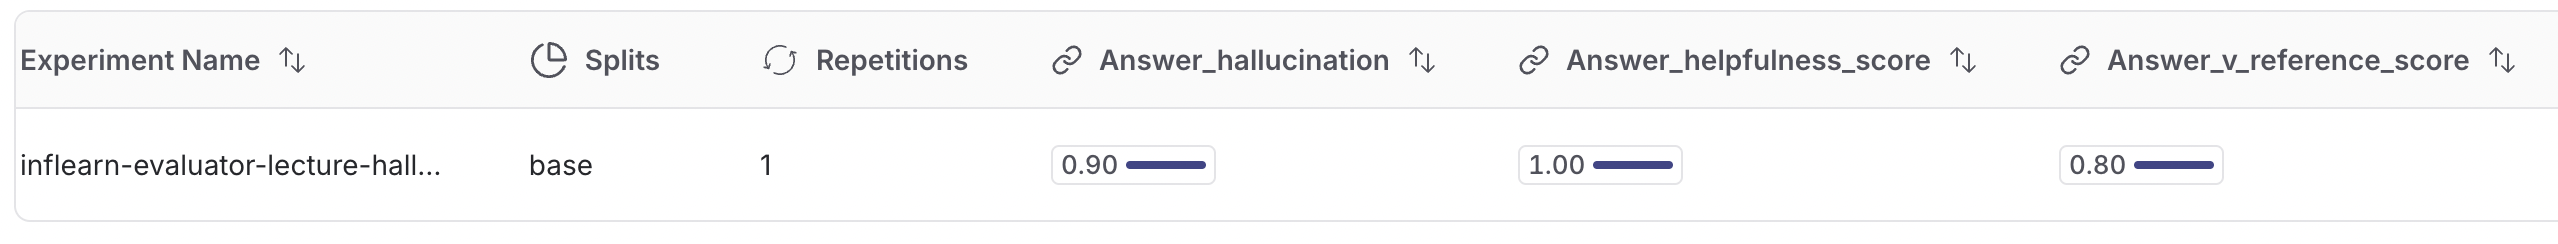

점수가 80점대...  

점수가 낮다면  
- ChatGPT가 정답지 작성 -> 정답지가 틀렸을 수도
- 임베딩 문제 -> 임베딩 효율이 낮음 -> retrieval 된 문서가 잘못되서...-> 답변 잘못됨
    - 한글의 경우 업스테이지 임베딩쓰니 30% 이상 성능 개선되기도...


이제 할루시네이션을 평가해보자.

In [13]:
experiment_results = evaluate(
    predict_rag_answer_with_context, # 어떤 함수를 활용해서 LLM 답변을 확인할지 지정, hallucination 판단 여부에 따라 `with_context` 사용
    data=dataset_name, # Evaluation에 사용될 dataset의 이름
    evaluators=[answer_hallucination_evaluator], # 실행할 Evaluator의 종류
    experiment_prefix="inflearn-evaluator-lecture-hallucination",
    metadata={"version": "income tax v1, gpt-4o-mini"}, 
)

View the evaluation results for experiment: 'inflearn-evaluator-lecture-hallucination-4db7f643' at:
https://smith.langchain.com/o/a0ac76fa-c299-507d-8cdf-5fd4bd50925c/datasets/5f6f64a8-b5ad-4d98-be9e-01731c8d5546/compare?selectedSessions=76866ce6-4adc-4ac0-b726-0de6767498d0




20it [00:14,  1.38it/s]


- 평가 결과를 보고 개별 문항을 확인하자.